In [1]:
import pandas as pd
import joblib

df = pd.read_csv('Data_for_Modeling.csv')

In [2]:
bgf = joblib.load('bgf_model.joblib')
ggf = joblib.load('ggf_model.joblib')

In [3]:
df['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    90,
    df['frequency'],
    df['recency'],
    df['T']
)

In [4]:
df_ggf = df[(df['frequency'] > 0) & (df['monetary_value'] > 0)].copy()

In [5]:
df_ggf['predicted_avg_profit'] = ggf.conditional_expected_average_profit(
    df_ggf['frequency'],
    df_ggf['monetary_value'],
)

In [6]:
df = df.merge(df_ggf[['CustomerID', 'predicted_avg_profit']], on='CustomerID', how='left')
df['predicted_avg_profit'] = df['predicted_avg_profit'].fillna(0)

In [7]:
df['predicted_clv'] = df['predicted_purchases'] * df['predicted_avg_profit']

In [8]:
df.head()

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases,predicted_avg_profit,predicted_clv
0,12347,6.0,365.0,367.0,599.701667,1.496257,602.846522,902.013315
1,12348,3.0,283.0,358.0,261.480000,0.938707,266.381270,250.053842
2,12352,6.0,260.0,296.0,181.540000,1.757149,183.820289,322.999603
3,12356,2.0,303.0,325.0,269.905000,0.803831,277.324643,222.922240
4,12358,1.0,149.0,150.0,523.200000,0.958625,541.307299,518.910871


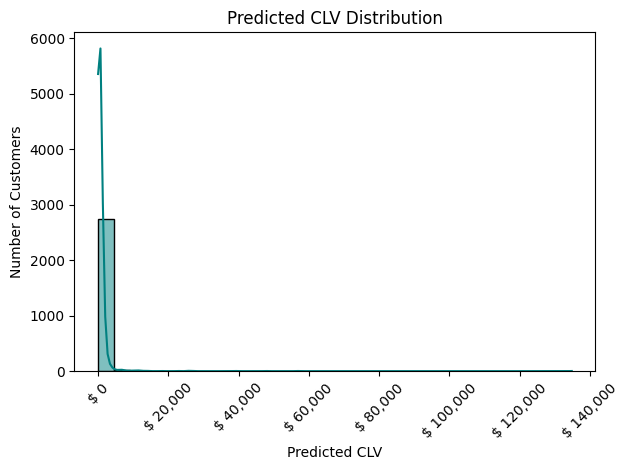

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

sns.histplot(df['predicted_clv'], kde=True, bins=30, color='teal')
plt.title('Predicted CLV Distribution')
plt.xlabel('Predicted CLV')
plt.ylabel('Number of Customers')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('$ {x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

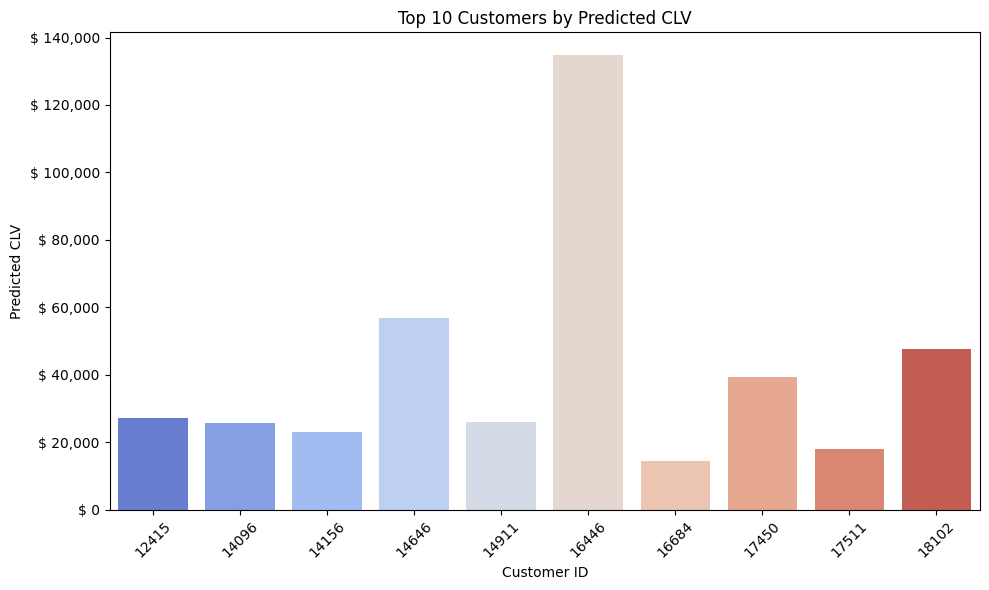

In [18]:
top_customers = df.sort_values(by='predicted_clv', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_customers, x='CustomerID', y='predicted_clv', palette='coolwarm')
plt.title('Top 10 Customers by Predicted CLV')
plt.xticks(rotation=45)
plt.xlabel('Customer ID')
plt.ylabel('Predicted CLV')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('$ {x:,.0f}'))
plt.tight_layout()
plt.show()


In [9]:
df[['CustomerID', 'predicted_purchases', 'predicted_avg_profit', 'predicted_clv']].to_csv('CLV_Predicted.csv', index=False)